In [15]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def calculate_significant(file_path, cut):
    significants = []
    with open(file_path, "r") as f:
        datas = f.readlines()
        for data in datas[1:]:
            data = data.split()
            x, y = int(int(data[1])/1000), int(int(data[3])/1000)
            q_value = float(data[6])
            if q_value>cut:
                continue
            significants.append((x, y))
    return significants

In [17]:
enhanced_cut = 4.3788876311750525e-07
enhanced_chr1_path = '/data1/lmh_data/MMSR_complete/analyse/GM12878/analyse/experiment_diff_loop/loop/enhanced/chr1_1000b/outputs/FitHiC.spline_pass1.res1000.significances.txt'
enhanced_chr1_significants = calculate_significant(enhanced_chr1_path, enhanced_cut)
print(len(enhanced_chr1_significants))

7966


In [18]:
hr_cut = 4.4189422377965387e-07
hr_chr1_path = '/data1/lmh_data/MMSR_complete/analyse/GM12878/analyse/experiment_diff_loop/loop/hr/chr1_1000b/outputs/FitHiC.spline_pass1.res1000.significances.txt'
hr_chr1_nums = calculate_significant(hr_chr1_path, hr_cut)
print(len(hr_chr1_nums))

25316


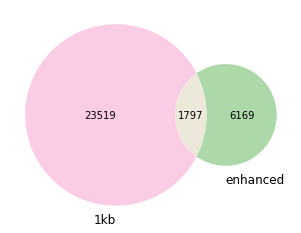

In [19]:
from matplotlib_venn import venn2
venn2(subsets = [set(hr_chr1_nums), set(enhanced_chr1_significants)], set_labels = ('1kb', 'enhanced'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
plt.show()

In [24]:
def _calculate_significant(file_path, cut):
    significants = []
    with open(file_path, "r") as f:
        datas = f.readlines()
        for data in datas[1:]:
            data = data.split()
            x, y = int(int(data[1])/1000), int(int(data[3])/1000)
            q_value = float(data[6])
            if q_value>cut:
                continue
            significants.append((x, y, q_value))
    return significants

def test(path):
    cut = 1
    significants = _calculate_significant(path, cut)
    significants = np.array(significants)
    nums = significants.shape[0]
    while True:
        cut /= 10
        _q_values = significants[:, 2] < cut
        _nums = np.sum(_q_values)
        if abs(nums - _nums) / _nums < 0.001:
            return significants[np.where(_q_values)[0], :]
        nums = _nums
        print(nums)

In [25]:
hr_result = test(hr_chr1_path)[:, :2]
print(hr_result.shape)

109634
64420
46834
36427
30166
25756
23568
20826
18818
17583
16126
15147
14280
13540
12744
12198
11455
10997
10553
10134
9742
9382
9053
8741
8504
8169
7940
7726
7471
7311
7122
6936
6767
6608
6430
6246
6082
5939
5796
5677
5585
5480
5350
5269
5133
5038
4918
4830
4742
4666
4588
4489
4398
4328
4275
4202
4151
4087
4024
3962
3911
3854
3794
3730
3700
3653
3592
3537
3503
3466
3431
3387
3333
3304
3271
3216
3186
3136
3097
3055
3023
2988
2940
2904
2856
2822
2796
2781
2755
2730
2710
2684
2662
2639
2609
2591
2556
2533
2504
2492
2471
2453
2422
2394
2372
2350
2328
2303
2278
2262
2244
2222
2207
2188
2167
2142
2118
2087
2070
2048
2035
2018
2004
1991
1981
1961
1948
1923
1906
1890
1880
1863
1852
1838
1825
1818
1809
1794
1786
1773
1751
1746
1742
1734
1731
1726
1719
1709
1703
1682
1680
1671
1661
1645
1627
1618
1605
1595
1588
1582
1572
1566
1562
1554
1551
1536
1528
1517
1506
1502
1494
1485
1476
1467
1460
(1459, 2)


In [27]:
hr_significants = list(map(tuple, hr_result))